## Lab 1. Cat & Dog classification
This lab will implement a cat and dog classification model on colab step by step.

* Target 
  1. Understand basic model train process
  2. Understand colab environment
  3. Understand tensorflow and keras framework
  4. Ability to implement architectures proposed by others

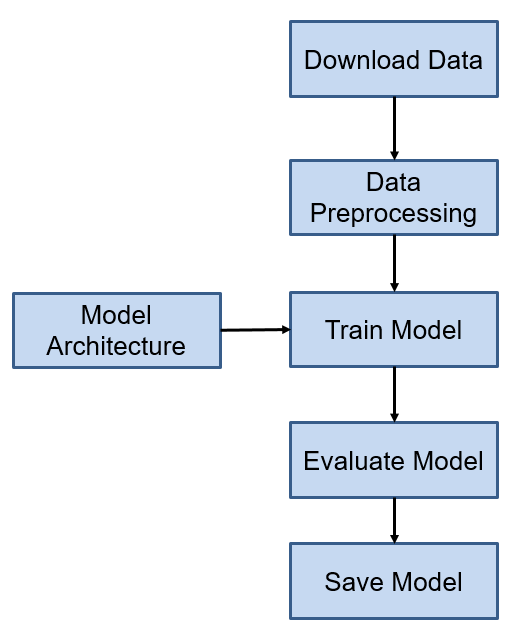

**Download Dataset**

In [3]:
import tensorflow as tf
import numpy as np

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

'wget' 不是內部或外部命令、可執行的程式或批次檔。


**Unzip zip file**

In [5]:
import os
import zipfile

# 將下載到的資料集解壓縮至/tmp
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Load dataset as a object**

In [7]:
image_size = (224,224)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/cats_and_dogs_filtered/train",
    seed=1337,
    image_size=image_size,
    label_mode="binary",
    batch_size=20
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/cats_and_dogs_filtered/validation",
    seed=1337,
    image_size=image_size,
    label_mode="binary",
    batch_size=20
)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
0.0010948742 1.0


**Show image**

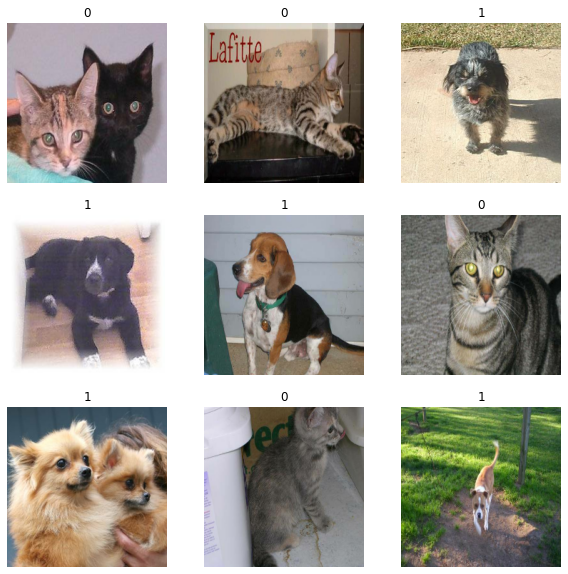

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow((images[i].numpy()*255).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

**Import some library from tensorflow/keras**

In [9]:
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import Activation, Flatten, Input

**Setting your model architecture**
1. `out = Conv2D(A,(B,C),activation='relu',padding='same')(in)`
  * in: input of Conv2D
  * out: output of Conv2D
  * A: Number of kernel
  * (B,C): Size of kernel
  * activation: 'relu' / 'sigmoid' / 'softmax' /...
  * padding: "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input.

2. `out = MaxPooling2D((A,B),strides=(C,D))(in)`
  * (A,B): pool size
  * strides: Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.

3. `out = Flatten()(in)`
  * Flattens the input. Does not affect the batch size.
  * example: `[[1, 2], [3, 4]]` => `[1, 2, 3, 4]`

4. `out = Dense(A,activation='relu')(in)`
  * Fully connected Layer
  * A: dimensionality of the output space


More infomation in this [Document](https://www.tensorflow.org/api_docs/python/tf/keras/layers).

**Example code**<br />
Acc: ~70% at epoch 40


```
def myModel():
  input_tensor=Input(shape=(224,224,3))

  x = Conv2D(4,(3,3),activation='relu',padding='same')(input_tensor)
  x = MaxPooling2D((4,4),strides=(4,4))(x)

  x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
  x = MaxPooling2D((3,3),strides=(3,3))(x)
  
  x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
  x = MaxPooling2D((3,3),strides=(3,3))(x)


  x = Flatten()(x)

  x = Dense(6,activation='relu')(x)

  output_tensor = Dense(1,activation='sigmoid')(x)
  model = Model(input_tensor,output_tensor)
  return model
```



In [17]:

##### Modify this block to implement other architectures #####

def myModel():
  input_tensor=Input(shape=(224,224,3))

  x = Conv2D(4,(3,3),activation='relu',padding='same')(input_tensor)
  x = MaxPooling2D((4,4),strides=(4,4))(x)

  x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
  x = MaxPooling2D((3,3),strides=(3,3))(x)

  x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
  x = MaxPooling2D((3,3),strides=(3,3))(x)


  x = Flatten()(x)

  x = Dense(6,activation='relu')(x)

  output_tensor = Dense(1,activation='sigmoid')(x)
  model = Model(input_tensor,output_tensor)
  return model

**Check model summary**

In [18]:
model = myModel()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 4)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 16)        1168

**Setting optimizer and loss function**

In [19]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
momentum = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=momentum, loss='binary_crossentropy', metrics=['accuracy'])


**Train**
* epoch: Number of epochs to train the model
* verbos: Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 

In [20]:
hist = model.fit(train_ds,
      epochs=40,
      validation_data=val_ds,
      verbose=1) 

Epoch 1/40
100/100 [==============================] - 10s 100ms/step - loss: 0.6929 - accuracy: 0.4990 - val_loss: 0.6929 - val_accuracy: 0.5010
Epoch 2/40
100/100 [==============================] - 10s 100ms/step - loss: 0.6931 - accuracy: 0.5190 - val_loss: 0.6901 - val_accuracy: 0.5420
Epoch 3/40
100/100 [==============================] - 10s 98ms/step - loss: 0.6894 - accuracy: 0.5365 - val_loss: 0.6879 - val_accuracy: 0.5510
Epoch 4/40
100/100 [==============================] - 10s 98ms/step - loss: 0.6864 - accuracy: 0.5615 - val_loss: 0.6856 - val_accuracy: 0.5540
Epoch 5/40
100/100 [==============================] - 10s 102ms/step - loss: 0.6854 - accuracy: 0.5660 - val_loss: 0.6837 - val_accuracy: 0.5920
Epoch 6/40
100/100 [==============================] - 10s 103ms/step - loss: 0.6843 - accuracy: 0.5670 - val_loss: 0.6820 - val_accuracy: 0.5480
Epoch 7/40
100/100 [==============================] - 11s 106ms/step - loss: 0.6809 - accuracy: 0.5705 - val_loss: 0.6801 - val_accu

**Visulaize train result**

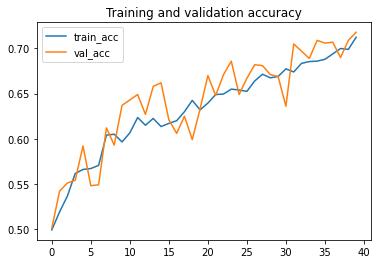

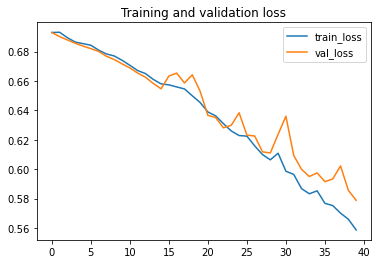

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
#from keras.preprocessing.image import img_to_array, load_img

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc,label="train_acc")
plt.plot(epochs, val_acc,label="val_acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss,label="train_loss")
plt.plot(epochs, val_loss,label="val_loss")
plt.title('Training and validation loss')
plt.legend()

**Save/Load model**

In [24]:
model.save("myModel.h5")

new_model = tf.keras.models.load_model('myModel.h5')

new_model.evaluate(val_ds,verbose=1)

50/50 [==============================] - 2s 34ms/step - loss: 0.5788 - accuracy: 0.7180


[0.578834593296051, 0.7179999947547913]

**Inference**

1/1 [==============================] - 0s 68ms/step
It is a dog.
Result = 0.692357
Test time :0.088797 second.


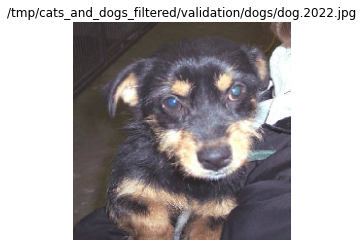

In [25]:
animal = "dog" # cat or dog
index = 2022 # 2000-2499
img_path = f"/tmp/cats_and_dogs_filtered/validation/{animal}s/{animal}.{index}.jpg"
img = load_img(img_path, target_size=(224, 224))  # this is a PIL image
plt.title(img_path)
plt.axis("off")
plt.imshow(img)

x = img_to_array(img)  # Numpy array with shape (224, 224, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 224, 224, 3)
x /= 255 # Rescale by 1/255

import time
start = time.time() # record start time

result = new_model.predict(x) # inference(predict)
if result < 0.5:
  print("It is a cat.")
else:
  print("It is a dog.")
finish = time.time() # record finish time

print ("Result = %f" %result) 
print("Test time :%f second." %(finish-start))